In [ ]:
import numpy as np
import codecs
import pickle
from collections import Counter
import json
from __future__ import division

In [ ]:
from collections import Counter
from matplotlib import pyplot as plt
import re
import itertools

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
from PIL import Image
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.decomposition import PCA, IncrementalPCA

In [ ]:
def read_text_file(i_file, encoding='utf-8'):
    lines = []
    with codecs.open( i_file, "r", "utf-8" ) as f:
        lines = f.read().splitlines()
    return lines

In [ ]:
import glob
import os

In [ ]:
import pandas as pd

### 1. Load data

#### The Yale Face Database B is available at http://vision.ucsd.edu/~iskwak/ExtYaleDatabase/ExtYaleB.html<br> Download the cropped version and extract to a folder such as Your_YaleB_Path

In [ ]:
IMG_PATH = "Your_YaleB_Path" + '/CroppedYale'
#IMG_PATH = os.path.join("/apps4/maonx/" + '/CroppedYale')

In [ ]:
img = Image.open(os.path.join(IMG_PATH, 'yaleB07/yaleB07_P00A-010E-20.pgm') )

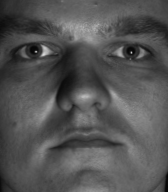

In [ ]:
img

In [ ]:
print("Image Shape: %d x %d" %(img.height, img.width))

Image Shape: 192 x 168


In [ ]:
### Remove bad image from list

In [ ]:
bad_images = read_text_file(os.path.join(IMG_PATH, "bad.txt"))

In [ ]:
bad_images = map(lambda x: x.split(' ')[0], bad_images)

In [ ]:
bad_images

[u'yaleB11_P00A+050E-40.pgm',
 u'yaleB11_P00A+095E+00.pgm',
 u'yaleB11_P00A-050E-40.pgm',
 u'yaleB11_P00A-110E+15.pgm',
 u'yaleB12_P00A+050E-40.pgm',
 u'yaleB12_P00A+095E+00.pgm',
 u'yaleB12_P00A-050E-40.pgm',
 u'yaleB12_P00A-110E+15.pgm',
 u'yaleB12_P00A-110E-20.pgm',
 u'yaleB13_P00A+050E-40.pgm',
 u'yaleB13_P00A+095E+00.pgm',
 u'yaleB13_P00A-050E-40.pgm',
 u'yaleB13_P00A-110E+15.pgm',
 u'yaleB15_P00A-035E+40.pgm',
 u'yaleB16_P00A+095E+00.pgm',
 u'yaleB16_P00A-010E+00.pgm',
 u'yaleB17_P00A-010E+00.pgm',
 u'yaleB18_P00A-010E+00.pgm']

#### Generate the lables Y

In [ ]:
Y = []
subjects = glob.glob(os.path.join(IMG_PATH, "*/"))
img_paths = []
def check_bad_img(x, bad_images):
    for e in bad_images:
        if x.find(e) >-1:
            return True
    return False
for i in range(len(subjects)):
    l_fn = glob.glob(subjects[i]+'*.pgm')
    l_fn = filter(lambda x: not check_bad_img(x, bad_images), l_fn)
    img_paths += l_fn
    Y += [i]*len(l_fn)
Y = np.array(Y)

In [ ]:
print("Number of images: %d. Number of subjects: %d" %(len(img_paths), len(subjects)))
print("Labels of the first 10 images:", Y[0:10]) # labels of the first 10 images
print("labels of the last 10 images", Y[-10:]) # labels of the last 10 images

Number of images: 2452. Number of subjects: 38
('Labels of the first 10 images:', array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))
('labels of the last 10 images', array([37, 37, 37, 37, 37, 37, 37, 37, 37, 37]))


#### Convert the data from images to numpy matrix

In [ ]:
dims = (192, 168)

In [ ]:
X = np.zeros((len(img_paths),dims[0]*dims[1]))
for i in range(len(img_paths)):
    image  = Image.open(img_paths[i])
    if not (image.height, image.width) == dims:
        image = image.resize(dims)
    X[i,:] = image.getdata()
    
print("X shape: " + str(X.shape))

X shape: (2452, 32256)


### 2. Feature Extraction
##### In this tutorial, we just apply PCA for the feature engineering task. In practice, some image processing and augmentation techniques would be used to enhance the the performance

In [ ]:
pca_model = PCA(copy=False, n_components=100) 

#### # We project the data to 100 dimensions associated with 100 eigenvectors corresponding to 100 greatest eigenvalues of the covariance matrix

In [ ]:
np.mean(X, axis=0).shape

(32256,)

In [ ]:
?? np.linalg.svd

In [ ]:
?? np.linalg.eig

In [ ]:
X_dash = X-np.mean(X,axis=0)
covM = np.matmul(X_dash.T, X_dash)
S, U = np.linalg.eig(covM)

In [ ]:
X_dash.shape

(2452, 32256)

In [ ]:
def MyPCA(X):
    meanX = np.mean(X, axis=0)
    U, S, V = np.linalg.svd(X-meanX,full_matrices=False)
    return U, S, V, meanX

#test_proj = MyPCA_Transform(X[0:10,:], V, 100, meanX)
def MyPCA_Transform(X, V, n_components, mean=None):
    if X.shape[1] != V.shape[1]:
        X = X.T
    assert n_components <= len(U)
    if mean is None:
        X = X - mean
    return np.matmul(X, V[0:n_components,:].T )

In [ ]:
pca_model.components_

array([[  8.36851058e-05,   1.94254392e-04,   3.71944186e-04, ...,
          1.21006788e-03,   1.07284590e-03,   9.85872231e-04],
       [  7.93233884e-03,   8.02012895e-03,   8.06054799e-03, ...,
         -4.91711422e-03,  -4.75457413e-03,  -4.69440311e-03],
       [ -2.50690195e-03,  -2.20834338e-03,  -1.91642615e-03, ...,
         -5.97240878e-03,  -5.84784306e-03,  -5.77175488e-03],
       ..., 
       [  1.98787170e-03,   9.60164160e-04,  -1.33676353e-03, ...,
         -8.98835018e-03,  -6.44271612e-03,  -4.67652209e-03],
       [ -7.31840509e-03,  -7.90592031e-03,  -8.39303341e-03, ...,
         -1.28009858e-02,  -1.30422053e-02,  -1.29786620e-02],
       [  4.64220951e-03,   5.63968093e-03,   6.43168697e-03, ...,
          2.82941760e-02,   2.93508278e-02,   3.10232029e-02]])

In [ ]:
V

array([[ -8.36851058e-05,  -1.94254392e-04,  -3.71944186e-04, ...,
         -1.21006788e-03,  -1.07284590e-03,  -9.85872231e-04],
       [ -7.93233884e-03,  -8.02012895e-03,  -8.06054799e-03, ...,
          4.91711422e-03,   4.75457413e-03,   4.69440311e-03],
       [ -2.50690195e-03,  -2.20834338e-03,  -1.91642615e-03, ...,
         -5.97240878e-03,  -5.84784306e-03,  -5.77175488e-03],
       ..., 
       [ -1.00406042e-03,  -1.00239652e-03,  -2.76683248e-04, ...,
          1.34609138e-02,   3.08799937e-03,   3.10085645e-04],
       [ -4.14643130e-03,  -2.68563670e-03,  -1.44810034e-03, ...,
         -2.61952734e-03,   3.10983275e-04,  -4.48720661e-03],
       [ -7.85708641e-03,  -8.71004242e-03,   5.92614117e-03, ...,
         -2.88762567e-03,  -1.94061842e-03,  -5.13916456e-03]])

In [ ]:
X_prj[0:10,:]

array([[  5.54657847e+03,   1.35658179e+03,  -8.13362935e+02,
         -8.24413388e+02,  -1.38767292e+03,  -1.32644579e+03,
          4.08995384e+01,  -4.32191113e+02,   9.06791228e+02,
         -1.47485889e+02,  -5.09595595e+02,   1.27213572e+03,
         -5.00421892e+02,  -8.53642953e+01,  -9.90917295e+02,
         -8.12345968e+02,  -1.25123171e+03,  -5.62159737e+01,
          8.84955515e+02,   7.07457042e+02,  -1.16151431e+02,
         -4.34618519e+02,   1.17828372e+02,  -3.27013564e+02,
          3.14197511e+02,   6.19583036e+02,   1.32505011e+02,
          1.81682934e+02,   6.20158334e+02,   3.65705273e+02,
          2.89301428e+02,   4.29737880e+02,  -1.08387895e+02,
          8.90691275e+02,   6.27142364e+01,  -2.61365718e+02,
          1.94157830e+02,   5.72126261e+01,  -3.33450941e+02,
         -9.05998702e+01,  -1.09331604e+02,   2.46504523e+02,
         -1.60613778e+02,  -7.23333255e+02,  -5.19202085e+02,
          1.65947069e+02,  -2.28093995e+02,   3.92504227e+02,
        

In [ ]:
U, S, V, meanX = MyPCA(X)

In [ ]:
for i in range(len(S)):
    if S[i] < 1e-6:
        print(i, S[i])

(2451, 7.3680932908653109e-10)


In [ ]:
for i in range(len(X)):
    for j in range(i+1, len(X)):
        if np.linalg.norm(X[i]-X[j])<1e-6:
            print(i, j)

In [ ]:
np.linalg.norm(np.matmul(np.matmul(U, np.diag(S)), V) - (X-np.mean(X, axis=0)))

2.4463707084577678e-09

In [ ]:
test_proj = MyPCA_Transform(X[0:10,:], V, 100, meanX)

In [ ]:
test_proj

array([[ -5.54657847e+03,  -1.35658179e+03,  -8.13362935e+02,
         -8.24413388e+02,   1.38767292e+03,  -1.32644579e+03,
          4.08995384e+01,  -4.32191113e+02,   9.06791228e+02,
          1.47485889e+02,  -5.09595595e+02,   1.27213572e+03,
         -5.00421892e+02,   8.53642952e+01,  -9.90917296e+02,
          8.12345968e+02,  -1.25123171e+03,   5.62159738e+01,
         -8.84955514e+02,   7.07457042e+02,  -1.16151429e+02,
          4.34618522e+02,  -1.17828371e+02,  -3.27013566e+02,
          3.14197518e+02,   6.19582994e+02,  -1.32505044e+02,
          1.81682969e+02,  -6.20158387e+02,   3.65705233e+02,
         -2.89301511e+02,   4.29737656e+02,  -1.08388041e+02,
          8.90691190e+02,  -6.27145426e+01,   2.61365152e+02,
         -1.94157101e+02,   5.72120444e+01,  -3.33451993e+02,
          9.06003214e+01,  -1.09332433e+02,   2.46503660e+02,
         -1.60611428e+02,   7.23327837e+02,  -5.19182987e+02,
          1.65944145e+02,   2.28089071e+02,  -3.92497372e+02,
        

In [ ]:
from scipy.spatial.distance import cdist

In [ ]:
cdist(X_prj, X_prj[0:10,:])

array([[     0.        ,   3475.98381029,   7559.43337009, ...,
          3603.1219511 ,   4639.844974  ,   4365.40772365],
       [  3475.98381029,      0.        ,   5202.75720849, ...,
          5948.25891751,   5525.80628533,   7117.47599437],
       [  7559.43337009,   5202.75720849,      0.        , ...,
          8698.03332956,   8201.97395131,  10007.83388382],
       ..., 
       [ 17526.70586871,  18625.25628661,  18077.65126776, ...,
         17441.86528117,  19810.44324504,  16409.16821053],
       [ 17278.64051452,  18294.19169027,  17544.90308193, ...,
         16987.93555227,  19294.47034399,  15881.7639734 ],
       [ 18306.83827044,  19331.42636911,  18375.20268165, ...,
         17665.51036048,  19973.716805  ,  16385.3862457 ]])

In [ ]:
centroids = X_prj[0:10,:]

In [ ]:
cdist(X_prj, centroids)

array([[     0.        ,   3475.98381029,   7559.43337009, ...,
          3603.1219511 ,   4639.844974  ,   4365.40772365],
       [  3475.98381029,      0.        ,   5202.75720849, ...,
          5948.25891751,   5525.80628533,   7117.47599437],
       [  7559.43337009,   5202.75720849,      0.        , ...,
          8698.03332956,   8201.97395131,  10007.83388382],
       ..., 
       [ 17526.70586871,  18625.25628661,  18077.65126776, ...,
         17441.86528117,  19810.44324504,  16409.16821053],
       [ 17278.64051452,  18294.19169027,  17544.90308193, ...,
         16987.93555227,  19294.47034399,  15881.7639734 ],
       [ 18306.83827044,  19331.42636911,  18375.20268165, ...,
         17665.51036048,  19973.716805  ,  16385.3862457 ]])

In [ ]:
np.repeat(X[0:10,:], 5, axis=0).shape

(50, 32256)

In [ ]:
from scipy.spatial.distance import euclidean

In [ ]:
?? cdist

In [ ]:
cdist(X_prj, centroids)

array([[     0.        ,   3475.98381029,   7559.43337009, ...,
          3603.1219511 ,   4639.844974  ,   4365.40772365],
       [  3475.98381029,      0.        ,   5202.75720849, ...,
          5948.25891751,   5525.80628533,   7117.47599437],
       [  7559.43337009,   5202.75720849,      0.        , ...,
          8698.03332956,   8201.97395131,  10007.83388382],
       ..., 
       [ 17526.70586871,  18625.25628661,  18077.65126776, ...,
         17441.86528117,  19810.44324504,  16409.16821053],
       [ 17278.64051452,  18294.19169027,  17544.90308193, ...,
         16987.93555227,  19294.47034399,  15881.7639734 ],
       [ 18306.83827044,  19331.42636911,  18375.20268165, ...,
         17665.51036048,  19973.716805  ,  16385.3862457 ]])

In [ ]:
def mycdist(X, Y):
    '''sX = np.zeros((X.shape[0], 1))
    sY = np.zeros((Y.shape[0], 1))
    for i in range(len(X)):
        sX[i] = np.matmul(X[i,:].T, X[i,:])
    for i in range(len(Y)):
        sY[i] = np.matmul(Y[i,:].T, Y[i,:])'''
    sX = np.square(np.linalg.norm(X, axis=1)).reshape(-1,1)
    sY = np.square(np.linalg.norm(Y, axis=1)).reshape(-1,1)
    #print(np.repeat(sX, len(Y), axis=1).shape, np.repeat(sY.T, len(X), axis=0).shape)
    return np.sqrt(np.repeat(sX, len(Y), axis=1) + np.repeat(sY.T, len(X), axis=0) - 2*np.matmul(X,Y.T))

In [ ]:
np.linalg.norm(X,axis=1).shape

(2452,)

In [ ]:
np.linalg.norm(X).shape

()

In [ ]:
mycdist(X_prj, centroids)

((2452, 10), (2452, 10))


/home/ai4u/build/anaconda2/envs/tf_built/lib/python2.7/site-packages/ipykernel/__main__.py:11: RuntimeWarning: invalid value encountered in sqrt


array([[     0.        ,   3475.98381029,   7559.43337009, ...,
          3603.1219511 ,   4639.844974  ,   4365.40772365],
       [  3475.98381029,             nan,   5202.75720849, ...,
          5948.25891751,   5525.80628533,   7117.47599437],
       [  7559.43337009,   5202.75720849,             nan, ...,
          8698.03332956,   8201.97395131,  10007.83388382],
       ..., 
       [ 17526.70586871,  18625.25628661,  18077.65126776, ...,
         17441.86528117,  19810.44324504,  16409.16821053],
       [ 17278.64051452,  18294.19169027,  17544.90308193, ...,
         16987.93555227,  19294.47034399,  15881.7639734 ],
       [ 18306.83827044,  19331.42636911,  18375.20268165, ...,
         17665.51036048,  19973.716805  ,  16385.3862457 ]])

In [ ]:
cosine_similarity(test_proj[0:10,:], X_prj[0:10,:]).shape

(10, 10)

In [ ]:
np.sum(np.square(test_proj+   X_prj[0:10,:]))

966190982.5033071

In [ ]:
#X_prj = pca_model.fit_transform(X)
pca_model.fit(X)
X_prj = pca_model.transform(X)

In [ ]:
print("Projected X shape: " + str(X_prj.shape))

Projected X shape: (2452, 100)


In [ ]:
print("100 eigenvectors of the covariance matrix: \n"+ str(pca_model.components_) )

100 eigenvectors of the covariance matrix: 
[[  8.36851058e-05   1.94254392e-04   3.71944186e-04 ...,   1.21006788e-03
    1.07284590e-03   9.85872231e-04]
 [  7.93233884e-03   8.02012895e-03   8.06054799e-03 ...,  -4.91711422e-03
   -4.75457413e-03  -4.69440311e-03]
 [ -2.50690195e-03  -2.20834338e-03  -1.91642615e-03 ...,  -5.97240878e-03
   -5.84784306e-03  -5.77175488e-03]
 ..., 
 [  3.97425800e-03   3.40628486e-03   1.78353956e-03 ...,   7.08667771e-03
    1.06614945e-02   1.21099785e-02]
 [ -5.59667959e-03  -6.22859410e-03  -7.33888335e-03 ...,  -1.58692735e-02
   -1.58627740e-02  -1.65366380e-02]
 [  5.06009346e-03   5.19608507e-03   5.54917852e-03 ...,   2.38249590e-02
    2.56697932e-02   2.66405577e-02]]


#### Basically, the PCA model transform the data by taking the zero-mean at first, and then projecting them on the above eigenvectors. We can check that as the following code

In [ ]:
test_proj = np.matmul((X[0:10,:] - np.mean(X, axis=0)), pca_model.components_.T)
print("The L2 distance: %.5f" % np.sum(np.square(test_proj-X_prj[0:10,:])))
print("test_proj", test_proj)
print("X_prj[0:10,:]", X_prj[0:10,:])

The L2 distance: 0.00000
('test_proj', array([[  5.54657847e+03,   1.35658179e+03,  -8.13362935e+02,
         -8.24413388e+02,  -1.38767292e+03,  -1.32644579e+03,
          4.08995384e+01,  -4.32191113e+02,   9.06791228e+02,
         -1.47485889e+02,  -5.09595595e+02,   1.27213572e+03,
         -5.00421892e+02,  -8.53642953e+01,  -9.90917296e+02,
         -8.12345968e+02,  -1.25123171e+03,  -5.62159748e+01,
          8.84955512e+02,   7.07457042e+02,  -1.16151429e+02,
         -4.34618515e+02,   1.17828362e+02,  -3.27013600e+02,
          3.14197502e+02,   6.19583009e+02,   1.32505079e+02,
          1.81683015e+02,   6.20158337e+02,   3.65705207e+02,
          2.89301436e+02,   4.29737749e+02,  -1.08388409e+02,
          8.90691487e+02,   6.27142073e+01,  -2.61365025e+02,
          1.94157129e+02,   5.72116019e+01,  -3.33451575e+02,
         -9.05998347e+01,  -1.09332849e+02,   2.46501829e+02,
         -1.60616084e+02,  -7.23323255e+02,  -5.19179314e+02,
          1.65945913e+02,  -2.2

## 3. Model Selection

### Train-Test splitting.

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_prj, Y, test_size=0.33, random_state=0)

### Logistic Regression

In [ ]:
clf =LogisticRegression()
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
print("Accuracy on test set: %.6f" %(np.sum(Y_pred == Y_test) / len(Y_pred)))

/home/ai4u/build/anaconda2/envs/tf_built/lib/python2.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ai4u/build/anaconda2/envs/tf_built/lib/python2.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy on test set: 0.806173


/home/ai4u/build/anaconda2/envs/tf_built/lib/python2.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


### Support Vector Machine with Linear Kernel

In [ ]:
clf =SVC(kernel='linear', C=1.0)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
print("Accuracy on test set: %.6f" %(np.sum(Y_pred == Y_test) / len(Y_pred)))

Accuracy on test set: 0.886420


#### You can change the kernel to 'rbf' and see what happens

### Two hidden layers Neural Networks

#### Feel free to change the number units of hidden layers and observe how it will affect the performance. <br>Tips: Increase the number of parameters when the model under-fits the data and decrease the number of params when the model over-fits the data

In [ ]:
clf = MLPClassifier(activation = 'logistic', hidden_layer_sizes=(850, 50), random_state=0, max_iter=200)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
print("Accuracy on test set: %.6f" %(np.sum(Y_pred == Y_test) / len(Y_pred)))

Accuracy on test set: 0.907407


### A short introduction to Tensorflow

In [ ]:
import tensorflow as tf
from tensorflow.python.framework import ops

In [ ]:
# Parameters
learning_rate = 0.1
num_steps = 300
batch_size = 128
display_step = 50

# Network Parameters
n_hidden_1 = 850 # 1st layer number of neurons
n_hidden_2 = 50 # 2nd layer number of neurons
num_input =  100# MNIST data input (img shape: 28*28)
num_classes = len(subjects) # MNIST total classes (0-9 digits)


In [ ]:
tf.reset_default_graph()
#del graph
graph = tf.Graph()
sess = tf.InteractiveSession(graph=graph)

with graph.as_default():
    # Define the computation graph (your neural networks)
    # Store layers weight & bias
    weights = {
        'h1': tf.Variable(tf.random_normal([num_input, n_hidden_1])),
        'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
        'out': tf.Variable(tf.random_normal([n_hidden_2, num_classes]))
    }
    biases = {
        'b1': tf.Variable(tf.random_normal([n_hidden_1])),
        'b2': tf.Variable(tf.random_normal([n_hidden_2])),
        'out': tf.Variable(tf.random_normal([num_classes]))
    }
    # tf Graph input
    Xp = tf.placeholder(name = "input", shape=[None, num_input], dtype = tf.float32)
    Yp = tf.placeholder(name='labels', shape=None, dtype=tf.int64)
    is_training = tf.placeholder(name='is_training', dtype=tf.bool)
    keep_prob = tf.placeholder(tf.float32) # dropout (keep probability)

    fc1 = tf.add(tf.matmul(Xp, weights['h1']), biases['b1']) #w1*x+b1
    #fc1 = tf.contrib.layers.batch_norm(fc1, is_training=is_training)
    #fc1 = tf.nn.relu(fc1)
    #fc1 = tf.nn.dropout(fc1, keep_prob)
    # Hidden fully connected layer with 256 neurons
    fc2 = tf.add(tf.matmul(fc1, weights['h2']), biases['b2']) #w2*fc1 + b2
    fc2 = tf.contrib.layers.batch_norm(fc2, is_training=is_training)
    fc2 = tf.nn.relu(fc2)
    #fc2 = tf.nn.dropout(fc2, keep_prob)
    # Output fully connected layer with a neuron for each class
    logits = tf.matmul(fc2, weights['out']) + biases['out']# w3*fc2+b3
    logits = tf.nn.dropout(logits, keep_prob)
    
    # Define loss and optimizer
    loss_op = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(
        logits=logits, labels=Yp))
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        train_op = optimizer.minimize(loss_op)
    #train_op = optimizer.minimize(loss_op)

    # Evaluate model (with test logits, for dropout to be disabled)
    pred = tf.argmax(logits, 1)
    correct_pred = tf.equal(tf.argmax(logits, 1), Yp)
    accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

    # Initialize the variables (i.e. assign their default value)
    init = tf.global_variables_initializer()

#### You could uncomment some lines in the above code for fine-tunning the model. I had used BatchNorm and Dropout layers to make the model more stable. The theory of these techniques can be found at: <br>
https://arxiv.org/abs/1502.03167 Batch Normalization: Accelerating Deep Network Training by Reducing Internal Covariate Shift
http://jmlr.org/papers/v15/srivastava14a.html Dropout: A Simple Way to Prevent Neural Networks from Overfitting 

In [ ]:
# ??  tf.nn.sparse_softmax_cross_entropy_with_logits

In [ ]:
with graph.as_default():
    sess.run(init)
    for step in range(num_steps):
        batch_begin = 0
        while batch_begin + batch_size<= len(X_train):
            batch_x = X_train[batch_begin:batch_begin+batch_size]
            batch_y = Y_train[batch_begin:batch_begin+batch_size]
            sess.run(train_op, feed_dict={Xp: batch_x, Yp: batch_y.astype(np.int64), keep_prob: 0.5, is_training:True})
            if step % display_step == 0 or step == 1:
                # Calculate batch loss and accuracy
                loss, acc = sess.run([loss_op, accuracy], feed_dict={Xp: batch_x,
                                                                     Yp: batch_y.astype(np.int64),
                                                                     keep_prob: 1.0, is_training:False})
                print("Step " + str(step) + ", Minibatch Loss= " + \
                      "{:.4f}".format(loss) + ", Training Accuracy= " + \
                      "{:.3f}".format(acc))
        
            batch_begin+=batch_size
print("Optimization Finished!")

Step 0, Minibatch Loss= 974.2451, Training Accuracy= 0.031
Step 0, Minibatch Loss= 458.8027, Training Accuracy= 0.109
Step 0, Minibatch Loss= 273.6662, Training Accuracy= 0.055
Step 0, Minibatch Loss= 215.8710, Training Accuracy= 0.086
Step 0, Minibatch Loss= 169.6773, Training Accuracy= 0.062
Step 0, Minibatch Loss= 144.6219, Training Accuracy= 0.141
Step 0, Minibatch Loss= 139.2727, Training Accuracy= 0.047
Step 0, Minibatch Loss= 141.0641, Training Accuracy= 0.039
Step 0, Minibatch Loss= 108.8144, Training Accuracy= 0.086
Step 0, Minibatch Loss= 105.7835, Training Accuracy= 0.062
Step 0, Minibatch Loss= 95.0523, Training Accuracy= 0.062
Step 0, Minibatch Loss= 78.8532, Training Accuracy= 0.047
Step 1, Minibatch Loss= 78.3092, Training Accuracy= 0.031
Step 1, Minibatch Loss= 71.7261, Training Accuracy= 0.078
Step 1, Minibatch Loss= 70.4906, Training Accuracy= 0.086
Step 1, Minibatch Loss= 85.7844, Training Accuracy= 0.055
Step 1, Minibatch Loss= 68.5329, Training Accuracy= 0.070
Step

In [ ]:
with graph.as_default():
    Y_pred, acc = sess.run([pred, accuracy], feed_dict={Xp: X_test,
                                                                     Yp: Y_test.astype(np.int64),
                                                                     keep_prob: 1.0, is_training:False})
    print("Accuracy test set : " + \
                      "{:.3f}".format(acc))

Accuracy test set : 0.885


### Exercise:
#### Split the data to 3 different sets: train, dev and test. Use the train-set for training, dev-set for tunning, and finally evaluate the model performance on test-set